# Data generation for 2020-2023

This notebook has the objective of generating data for the regression model.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [232]:
dfIT = pd.read_csv('Data_04.csv')
dfIT=dfIT.set_index('date')
dfIT.index=pd.to_datetime(dfIT.index, format='%Y-%m-%d')

extra_months = 49
new_index = pd.date_range(start=dfIT.index[0], periods=len(dfIT) + extra_months, freq='MS')
dfIT = dfIT.reindex(new_index)

display(dfIT)

,ratio,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3
2010-01-01,0.970427,7807.900832,NaN,8484.500000,7577.0
2010-02-01,1.092719,6460.947916,1520.357143,6964.142857,7060.0
2010-03-01,1.413511,5036.395372,676.738095,6287.404762,7119.0
2010-04-01,1.614520,3635.755361,-763.809524,7051.214286,5870.0
2010-05-01,1.641018,3412.516655,-1377.047619,8428.261905,5600.0
...,...,...,...,...,...
2023-09-01,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN


## Generating data via autocorrelations and analytics

### Autocorrelation for gas consumption

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  120
Model:             Restr. AutoReg(60)   Log Likelihood                -452.022
Method:               Conditional MLE   S.D. of innovations            452.488
Date:                Thu, 09 May 2024   AIC                            922.044
Time:                        18:36:01   BIC                            940.893
Sample:                            60   HQIC                           929.417
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        245.3832    224.110      1.095      0.274    -193.864     684.630
y.L1           0.1518      0.082      1.856      0.063      -0.008       0.312
y.L2          -0.0309      0.058     -0.532      0.5

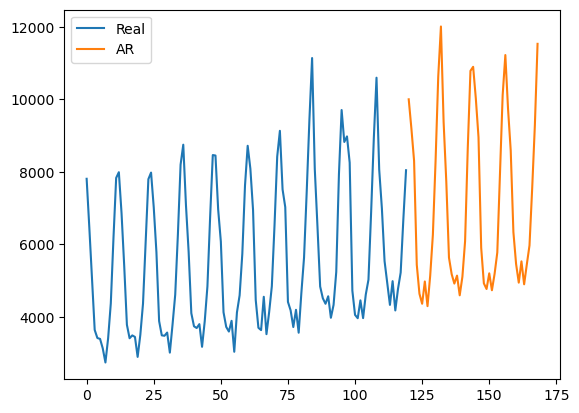

In [233]:
from statsmodels.tsa.ar_model import AutoReg

# train autoregression
Y=dfIT.values[:,1]
Y=Y[~np.isnan(Y)]
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

a = np.empty(12*4)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS'),'Gas consumed Mm3'] = forecast

<Axes: ylabel='Gas consumed Mm3'>

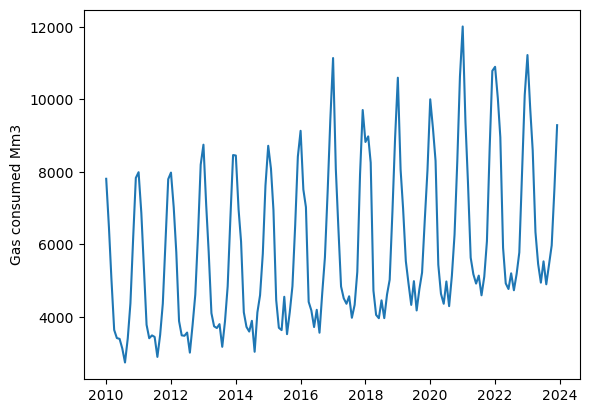

In [234]:
sb.lineplot(data=dfIT.loc[:,'Gas consumed Mm3'])

### Autocorrelation for total stocks

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  120
Model:             Restr. AutoReg(60)   Log Likelihood                -418.805
Method:               Conditional MLE   S.D. of innovations            260.122
Date:                Thu, 09 May 2024   AIC                            855.611
Time:                        18:36:02   BIC                            874.460
Sample:                            60   HQIC                           862.984
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0860    299.015      0.117      0.907    -550.972     621.144
y.L1           0.3378      0.108      3.139      0.002       0.127       0.549
y.L2          -0.2363      0.061     -3.899      0.0

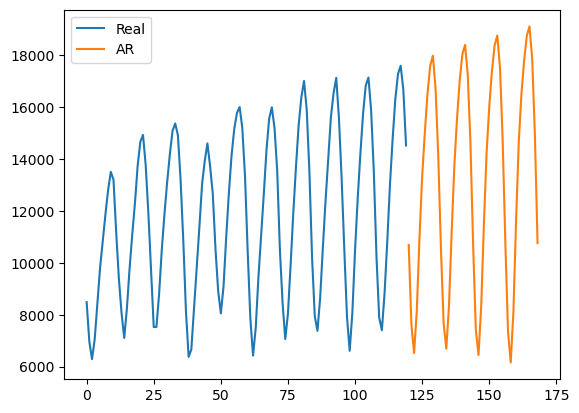

In [235]:
# train autoregression
Y=dfIT.values[:,3]
Y=Y[~np.isnan(Y)]
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

a = np.empty(12*4)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS'),'Total Gas Stocks Mm3'] = forecast

Comment: Italian max storage capacity is orders of magnitude more than what is observed here, so growth of strategic stocks would not be impeded by this factor. Lower peaks may be due to a higher consumption of energy, on par with the other metric.

### Autocorrelation for ratio

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  120
Model:             Restr. AutoReg(60)   Log Likelihood                  92.888
Method:               Conditional MLE   S.D. of innovations              0.051
Date:                Thu, 09 May 2024   AIC                           -169.776
Time:                        18:36:03   BIC                           -153.021
Sample:                            60   HQIC                          -163.222
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.035      0.636      0.525      -0.046       0.090
y.L1           0.2372      0.074      3.193      0.001       0.092       0.383
y.L12          0.4885      0.090      5.414      0.0

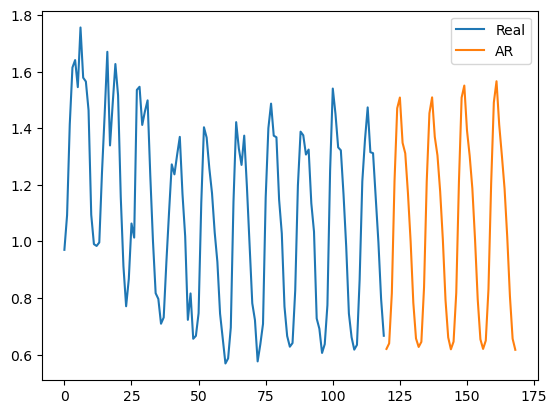

In [236]:
# train autoregression
Y=dfIT.values[:,0]
Y=Y[~np.isnan(Y)]

window = [1,12,24,26,48,60]
model = AutoReg(Y, lags=window, missing='drop')
model_fit = model.fit()

a = np.empty(12*4)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS'),'ratio'] = forecast

### Sine wave extension for ratio

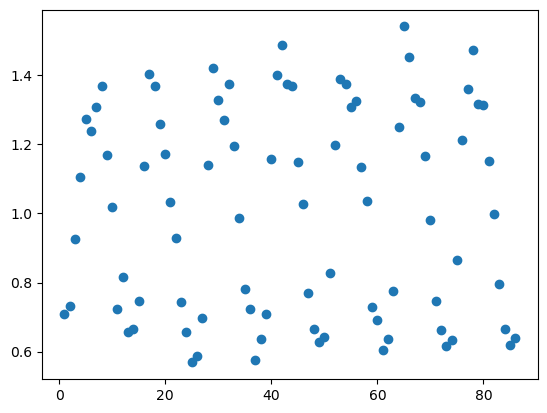

Amplitude=0.40, Angular freq.=0.52, phase=-1.94, offset=1.02, Max. Cov.=0.004508


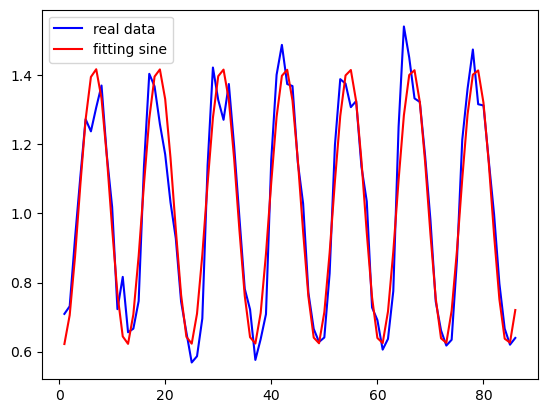

In [237]:
import numpy as np
import scipy.optimize

yy = dfIT.values[36:122,0]
yy=yy[~np.isnan(yy)]
tt = np.arange(1,len(yy)+1,1)

plt.scatter(tt, yy)
plt.show()

def fit_sin(tt, yy):
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1] - tt[0]))  # Assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:]) + 1])  # Exclude the zero frequency peak related to offset
    guess_amp = np.std(yy) * 2.0**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.0 * np.pi * guess_freq, 0.0, guess_offset])

    def sinfunc(t, A, w, p, c):
        return A * np.sin(w * t + p) + c

    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w / (2.0 * np.pi)
    fitfunc = lambda t: A * np.sin(w * t + p) + c
    return {
        "amp": A,
        "omega": w,
        "phase": p,
        "offset": c,
        "freq": f,
        "period": 1.0 / f,
        "fitfunc": fitfunc,
        "maxcov": np.max(pcov),
        "rawres": (guess, popt, pcov)
    }

def sinfunc(t, A, w, p, c):
        return A * np.sin(w * t + p) + c

res1 = fit_sin(tt, yy)
print(f"Amplitude={res1['amp']:.2f}, Angular freq.={res1['omega']:.2f}, phase={res1['phase']:.2f}, offset={res1['offset']:.2f}, Max. Cov.={res1['maxcov']:.6f}")

yy1 = sinfunc(tt, res1['amp'], res1['omega'], res1['phase'], res1['offset'])
plt.plot(tt, yy, "-b", label="real data")
plt.plot(tt, yy1, "-r", label="fitting sine")
plt.legend(loc="upper left")
plt.show()

## Generating all other features

In [238]:
#'ratio' autoestimator
dfIT['autoEstimator'] = dfIT['ratio']*dfIT['Gas consumed Mm3']

#Extracting features
dfIT['Month'] = dfIT.index.month
dfIT['sinMonth'] = (1 + np.sin((dfIT['Month']+2)/6*np.pi))/2 #January is numerically close to December

#Shifted features
dfIT['Gas consumed last month Mm3'] = dfIT['Gas consumed Mm3'].shift(1) # Gas consumed the last month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas consumed last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas consumed Mm3']
dfIT['Gas imported last month Mm3'] = dfIT['Gas imported Mm3'].shift(1) # Gas imported the last month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas imported Mm3']

#Balance features
dfIT['Gas consumed from stocks Mm3'] = dfIT['Total Gas Stocks Mm3'].shift(1) - dfIT['Total Gas Stocks Mm3'] #Gas that exited the reserves in 1 month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas consumed from stocks Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas consumed from stocks Mm3']
dfIT['Net new gas (appx) Mm3'] = dfIT['Gas consumed Mm3'] - dfIT['Gas consumed from stocks Mm3']
dfIT['Net new gas (appx) last month Mm3'] = dfIT['Net new gas (appx) Mm3'].shift(1)
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Net new gas (appx) last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Net new gas (appx) last month Mm3']

#ratio features
dfIT['sine_ratio1'] = sinfunc(dfIT['Month'], res1['amp'], res1['omega'], res1['phase'], res1['offset'])
dfIT['sinEstimator1'] = dfIT['Gas consumed Mm3']*dfIT['sine_ratio1']

#Generating columns for imported gas and similar features
dfIT.loc[pd.date_range(start=pd.to_datetime('2020-01-01',format="%Y-%m-%d"), end=dfIT.index[-1], freq='MS'),'Gas imported Mm3'] = np.nan

dfIT = dfIT.drop(columns=['Month','sinMonth','ratio','sine_ratio1'])

display(dfIT)

,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3,autoEstimator,Gas consumed last month Mm3,Gas imported last month Mm3,Net new gas (appx) Mm3,Net new gas (appx) last month Mm3,sinEstimator1
2010-01-01,7807.900832,1520.357143,8484.500000,7577.0,7577.000000,6460.947916,7060.0,6287.543689,6287.543689,4857.362094
2010-02-01,6460.947916,1520.357143,6964.142857,7060.0,7060.000000,7807.900832,7577.0,4940.590773,6287.543689,4559.550119
2010-03-01,5036.395372,676.738095,6287.404762,7119.0,7119.000000,6460.947916,7060.0,4359.657277,4940.590773,4399.839472
2010-04-01,3635.755361,-763.809524,7051.214286,5870.0,5870.000000,5036.395372,7119.0,4399.564884,4359.657277,3929.181854
2010-05-01,3412.516655,-1377.047619,8428.261905,5600.0,5600.000000,3635.755361,5870.0,4789.564274,4399.564884,4338.567548
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,5444.892470,-963.101142,18749.842778,NaN,6460.949625,4895.665639,NaN,6407.993612,6176.512876,6337.478940
2023-10-01,5969.430563,-354.695446,19104.538224,NaN,6059.322536,5444.892470,NaN,6324.126008,6407.993612,5711.215420
2023-11-01,7545.375155,1231.480493,17873.057731,NaN,6081.194582,5969.430563,NaN,6313.894663,6324.126008,5782.940249
2023-12-01,9287.392757,2912.919296,14960.138434,NaN,6094.151753,7545.375155,NaN,6374.473461,6313.894663,5981.918144


## Regressing imports

Bisogna adattare quanto sotto in modo da allenare il modello sui dati fino al 2019 e poi fargli fare il forecast sui dati dal 2020 in poi, problema: la feature 'Gas imported last month Mm3' dipende dal forecast fatto, infatti (la mia idea è per senso logico) dare il dato del gas che ha appena previsto per BUONO e generare il 'Gas imported last month' con questi dati. servirà un ciclo for o while dove eseguiamo il codice riga per riga.

In [239]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

predictions = y_pred_RF

plt.plot(y_test[1:240])
plt.plot(y_pred_RF[1:240])
plt.show()
plt.scatter(y_test,y_pred_RF)

NameError: name 'X_train' is not defined

In [ ]:
predictions = []

#questo mette le colonna 'imported gas' come prima colonna
dfIT.insert(0, 'Gas imported Mm3', df.pop('Gas imported Mm3'))

Y_predicted = dfIT.loc[pd.to_datetime('2020-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3']

for date in pd.date_range(start=pd.to_datetime('2020-01-01',format="%Y-%m-%d"), end=dfIT.index[-1], freq='MS')

    dfIT.loc[date,'Gas imported last month Mm3'] = Y_predicted
    #Take inputs
    Z=dfIT.loc[date,:].values
    Y=Z[:,0]
    X=Z[:,1:]

    Y_predicted = NOMEDELMODELLO.predict(X)
    predictions.append(Y_predicted)


plt.plot(Y_predicted)
plt.show()

ValueError: params is required to have ndim 1 but has ndim 2